In [30]:
!pip install scikit-learn

In [31]:
import numpy as np
import pandas as pd
import sklearn
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
genres = [
    'Action',
    'Comedy',
    'Drama',
    'Romance',
    'Thriller',
    'Horror',
    'Sci-Fi',
    'Fantasy',
    'Crime',
    'Adventure'
]

df_users = pd.read_csv('users_extended_modified.csv')
df_films = pd.read_csv('films.csv')
X = df_users.drop(columns=['user_id', 'favorite_movie_id']).values
y = df_users['favorite_movie_id'].values

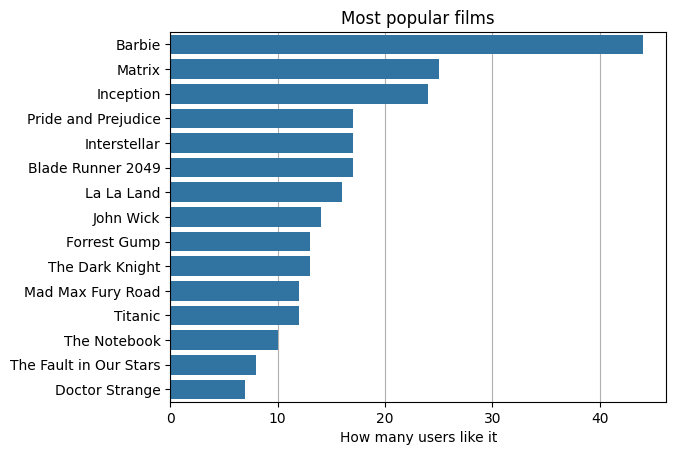

In [34]:
# Firstly we need to show which film appear the most,
# their probability to be recommended is higher

df_count_films = df_users.groupby(
    by='favorite_movie_id'
    )['user_id'].count().reset_index().sort_values(
        by='user_id', ascending=False
        )
df_count_films.rename(columns={'user_id':'count',
                               'favorite_movie_id':'movie_id'}, inplace=True)
df_count_films = df_count_films.merge(df_films, on='movie_id').head(15)
ax1 = sns.barplot(
    y='film_name',
    x='count',
    data=df_count_films,
    zorder=2
)
plt.xlabel('How many users like it')
plt.ylabel('')
plt.title('Most popular films')
ax1.grid(axis='x', zorder=1)
plt.savefig('most_popular_films.png', bbox_inches='tight')
plt.show()

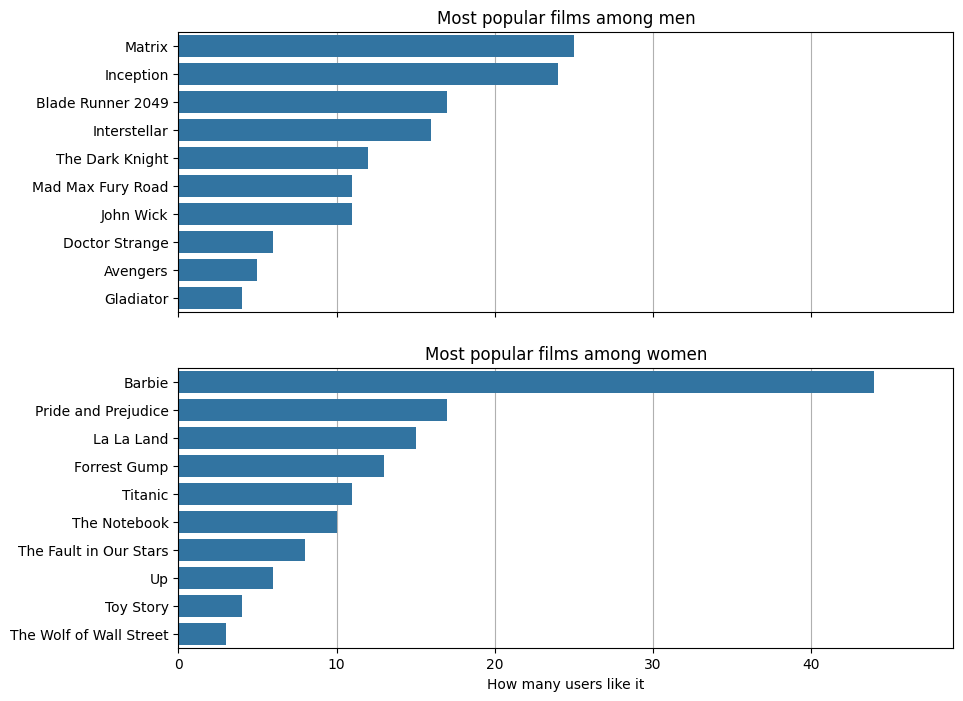

In [35]:
# Now we will break down our data into male and female parts.
# We will analyse how preferences differ between genders

df_count_films_for_men = df_users[df_users['gender'] == 1].groupby(
    by='favorite_movie_id'
    )['user_id'].count().reset_index().sort_values(by='user_id',
                                                   ascending=False)
df_count_films_for_men.rename(columns={'user_id':'count',
                                       'favorite_movie_id':'movie_id'},
                                       inplace=True)
df_count_films_for_men = df_count_films_for_men.merge(
    df_films, on='movie_id').head(10)
df_count_films_for_women = df_users[df_users['gender'] == 0].groupby(
    by='favorite_movie_id'
    )['user_id'].count().reset_index().sort_values(by='user_id',
                                                   ascending=False)
df_count_films_for_women.rename(columns={'user_id':'count',
                                         'favorite_movie_id':'movie_id'},
                                         inplace=True)
df_count_films_for_women = df_count_films_for_women.merge(
    df_films, on='movie_id').head(10)

fig, (ax2, ax3) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
sns.barplot(
    y='film_name',
    x='count',
    data=df_count_films_for_men,
    ax=ax2,
    zorder=2
)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Most popular films among men')
ax2.grid(axis='x', zorder=1)

sns.barplot(
    y='film_name',
    x='count',
    data=df_count_films_for_women,
    ax=ax3,
    zorder=2
)
ax3.set_xlabel('How many users like it')
ax3.set_ylabel('')
ax3.set_title('Most popular films among women')
ax3.grid(axis='x', zorder=1)

max_count = max(df_count_films_for_men['count'].max(),
                df_count_films_for_women['count'].max())
ax1.set_xlim(0, max_count + 5)
ax2.set_xlim(0, max_count + 5)
plt.savefig('most_popular_films_divided_by_gender.png', bbox_inches='tight')
plt.show()

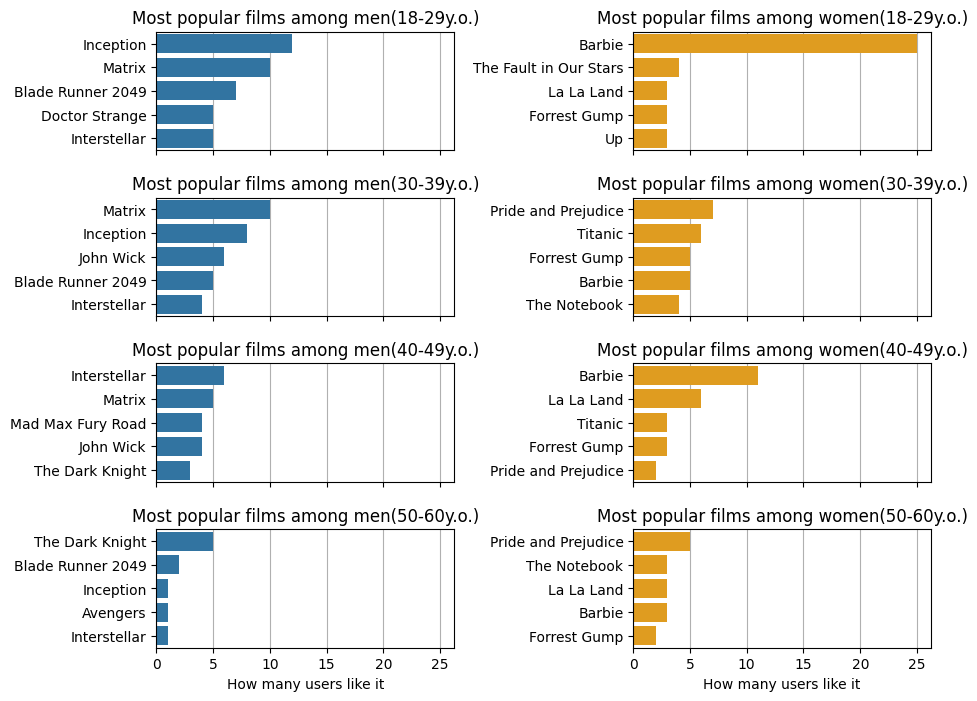

In [36]:
# Now we will go further and break down our data into age groups.
# We will analyse how preferences differ between age groups

# Preparing data
df_users['age_group'] = pd.cut(
    df_users['age'],
    bins = [17, 29, 39, 49, 60],
    labels=['18-29', '30-39', '40-49', '50-60']
)

df_men_users = df_users[df_users['gender'] == 1]
df_women_users = df_users[df_users['gender'] == 0]
list_of_df_count_films_for_men_devided_by_age = []
list_of_df_count_films_for_women_devided_by_age = []
list_of_ages = [
    '18-29',
    '30-39',
    '40-49',
    '50-60'
]

for i in range(0, 4):
  list_of_df_count_films_for_men_devided_by_age.append(
      df_men_users[df_men_users['age_group'] == list_of_ages[i]].groupby(
          by='favorite_movie_id'
          )['user_id'].count().reset_index().sort_values(by='user_id',
                                                         ascending=False))
  list_of_df_count_films_for_men_devided_by_age[i].rename(
      columns={'user_id':'count', 'favorite_movie_id':'movie_id'},
      inplace=True)
  list_of_df_count_films_for_men_devided_by_age[
      i] = list_of_df_count_films_for_men_devided_by_age[
          i].merge(df_films, on='movie_id').head(5)

  list_of_df_count_films_for_women_devided_by_age.append(
      df_women_users[df_women_users['age_group'] == list_of_ages[i]].groupby(
          by='favorite_movie_id'
          )['user_id'].count().reset_index().sort_values(by='user_id',
                                                         ascending=False))
  list_of_df_count_films_for_women_devided_by_age[i].rename(
      columns={'user_id':'count', 'favorite_movie_id':'movie_id'},
      inplace=True)
  list_of_df_count_films_for_women_devided_by_age[
      i] = list_of_df_count_films_for_women_devided_by_age[
          i].merge(df_films, on='movie_id').head(5)

# Vizualising
fig, axes = plt.subplots(4, 2, figsize=(10, 8), sharex=True)
for i in range(0, 4):
  sns.barplot(
      y='film_name',
      x='count',
      data=list_of_df_count_films_for_men_devided_by_age[i],
      ax=axes[i, 0],
      zorder=2
  )
  axes[i, 0].set_xlabel('How many users like it')
  axes[i, 0].set_ylabel('')
  title = 'Most popular films among men(' + list_of_ages[i] + 'y.o.)'
  axes[i, 0].set_title(title)
  axes[i, 0].grid(axis='x', zorder=1)
  sns.barplot(
      y='film_name',
      x='count',
      data=list_of_df_count_films_for_women_devided_by_age[i],
      ax=axes[i, 1],
      zorder=2,
      color='orange'
  )
  axes[i, 1].set_xlabel('How many users like it')
  axes[i, 1].set_ylabel('')
  title = 'Most popular films among women(' + list_of_ages[i] + 'y.o.)'
  axes[i, 1].set_title(title)
  axes[i, 1].grid(axis='x', zorder=1)

plt.subplots_adjust(
    hspace=0.4,
    wspace=0.6
)
plt.savefig('most_popular_films_divided_by_gender_and_age.png',
            bbox_inches='tight')
plt.show()

In [37]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=1))
])

mod = GridSearchCV(estimator=pipe,
                   param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
                   cv=3)

mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002740,0.000866,0.002926,0.000429,1,{'model__n_neighbors': 1},0.14,0.12,0.15,0.136667,0.012472,8
1,0.001487,0.000067,0.002116,0.000039,2,{'model__n_neighbors': 2},0.16,0.09,0.12,0.123333,0.028674,10
2,0.001500,0.000035,0.002364,0.000353,3,{'model__n_neighbors': 3},0.12,0.12,0.15,0.130000,0.014142,9
3,0.001448,0.000021,0.002121,0.000029,4,{'model__n_neighbors': 4},0.15,0.14,0.16,0.150000,0.008165,7
4,0.001539,0.000145,0.002169,0.000056,5,{'model__n_neighbors': 5},0.17,0.19,0.17,0.176667,0.009428,6
5,0.001434,0.000011,0.002159,0.000025,6,{'model__n_neighbors': 6},0.18,0.19,0.20,0.190000,0.008165,2
6,0.001427,0.000030,0.002162,0.000076,7,{'model__n_neighbors': 7},0.17,0.22,0.18,0.190000,0.021602,2
7,0.001432,0.000012,0.002175,0.000028,8,{'model__n_neighbors': 8},0.17,0.20,0.19,0.186667,0.012472,5
8,0.001435,0.000019,0.002278,0.000086,9,{'model__n_neighbors': 9},0.19,0.23,0.19,0.203333,0.018856,1
9,0.001432,0.000032,0.002246,0.000033,10,{'model__n_neighbors': 10},0.17,0.22,0.18,0.190000,0.021602,2


In [38]:
def make_recommendation(user_info, mod, df_films):
  film_id = mod.predict(user_info)
  return df_films[df_films['movie_id'] == film_id[0]].iloc[0, 1]

In [39]:
#Action,Drama,Comedy,Romance,SciFi,Horror,Thriller,Fantasy,Animation,Crime
make_recommendation(np.array([[20,0,9,1,1,1,9,1,9,9,1,9]]), mod, df_films)
#14,Matrix,1,0,0,0,1,0,1,1,0,0

'Matrix'

In [40]:
make_recommendation(np.array([[35,1,3,8,5,7,2,1,1,5,4,3]]), mod, df_films)
#11,Barbie,0,1,1,1,0,0,0,1,1,0

'Barbie'

In [41]:
make_recommendation(np.array([[30,1,10,4,3,2,9,4,5,7,3,4]]), mod, df_films)
#14,Matrix,1,0,0,0,1,0,1,1,0,0

'Matrix'

In [42]:
make_recommendation(np.array([[33,1,10,2,5,6,6,10,7,6,8,8]]), mod, df_films)
#14,Matrix,1,0,0,0,1,0,1,1,0,0

'Matrix'

In [43]:
make_recommendation(np.array([[43,0,2,10,8,10,3,1,1,6,4,3]]), mod, df_films)
#6,The Notebook,0,1,0,1,0,0,0,0,0,0

'The Notebook'

In [44]:
make_recommendation(np.array([[45,1,10,10,10,10,10,10,10,10,10,10]]),
                    mod, df_films)
#7,Interstellar,1,1,0,0,1,0,1,1,0,0

'Interstellar'